<a href="https://colab.research.google.com/github/cheybte/AI_Project/blob/main/deeplearningDatamaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification des panneaux de signalisation par Deep Learning

Objectif : entraîner un modèle de deep learning (CNN) pour reconnaître automatiquement
les panneaux de signalisation à partir d’images.

- Dataset : (nom du dataset, chemin dans Google Drive)
- Outil : Google Colab + TensorFlow / Keras


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
BASE_DIR  = "/content/drive/MyDrive/datamaning/data"
TRAIN_DIR = BASE_DIR + "/Train"
TEST_DIR  = BASE_DIR + "/Test"

print("Contenu de data :", os.listdir(BASE_DIR))
print("Nombre de classes dans Train :", len(os.listdir(TRAIN_DIR)))

Contenu de data : ['Test.csv', 'Meta.csv', 'signnames.csv', 'Train.csv', 'Meta', 'Test', 'Train', 'best_model.keras']
Nombre de classes dans Train : 43


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

img_height = 64   # tu peux mettre 32 si tu veux aller plus vite
img_width  = 64
batch_size = 64   # 32 ou 64

train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    validation_split=0.2,  # 80% train, 20% validation
    subset="training",
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=42
)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes :", class_names)
print("Nombre de classes :", num_classes)


Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.
Classes : ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']
Nombre de classes : 43


⚙️ 3. Optimisation du pipeline (cache / prefetch) + normalisation

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)


In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


🧠 4. Définir un CNN « normal » pour ton projet

In [ ]:
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),

    data_augmentation,
    normalization_layer,

    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(256, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 661,867 (2.52 MB)

 Trainable params: 661,867 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

🔧 5. Compiler le modèle

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


⏱️ 6. Callbacks (sauvegarder le meilleur modèle)

In [ ]:
checkpoint_path = BASE_DIR + "/best_model.keras"

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=7,
    restore_best_weights=True,
    monitor='val_loss'
)


In [ ]:
epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[checkpoint_cb, early_stopping_cb]
)


Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 1107s 2s/step - accuracy: 0.6429 - loss: 1.0692 - val_accuracy: 0.8736 - val_loss: 0.3915
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8027 - loss: 0.5776 - val_accuracy: 0.9265 - val_loss: 0.2297
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8759 - loss: 0.3668 - val_accuracy: 0.9600 - val_loss: 0.1381
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9108 - loss: 0.2694 - val_accuracy: 0.9626 - val_loss: 0.1175
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9282 - loss: 0.2152 - val_accuracy: 0.9685 - val_loss: 0.1013
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9379 - loss: 0.1860 - val_accuracy: 0.9746 - val_loss: 0.0833
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9466 - loss: 0.1625 - val_accuracy: 0.9784 - val_loss: 0.0667
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9511 - loss: 0.1470 - val_acc

📝 Phrase que tu peux mettre dans ton rapport

« Nous avons fixé le nombre d’epochs à 30 pour laisser au modèle une marge suffisante d’apprentissage.
Cependant, l’analyse des courbes d’accuracy et de loss montre que la convergence est atteinte vers la 8ᵉ epoch.
L’utilisation d’EarlyStopping permet d’éviter le surapprentissage et d’arrêter l’entraînement automatiquement lorsque la performance sur le jeu de validation cesse de s’améliorer. »

📈 8. Afficher les courbes (accuracy / loss)

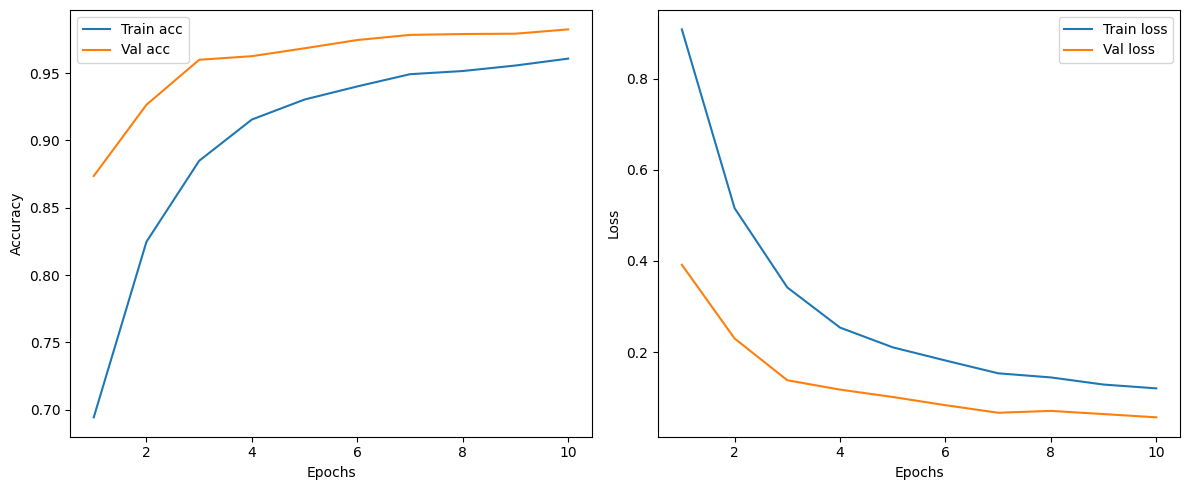

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curves(history):
    acc      = history.history['accuracy']
    val_acc  = history.history['val_accuracy']
    loss     = history.history['loss']
    val_loss = history.history['val_loss']
    epochs   = range(1, len(acc) + 1)

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(epochs, acc, label='Train acc')
    plt.plot(epochs, val_acc, label='Val acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, loss, label='Train loss')
    plt.plot(epochs, val_loss, label='Val loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_learning_curves(history)


🔍 9. Utiliser Test pour tester ton modèle

In [ ]:
import numpy as np
import os

test_files = sorted([
    os.path.join(TEST_DIR, f)
    for f in os.listdir(TEST_DIR)
    if f.lower().endswith(".png")
])

len(test_files)


12630

In [ ]:
def load_test_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, [img_height, img_width])
    img = tf.cast(img, tf.float32)   # PAS de /255 ici
    return img


test_ds = tf.data.Dataset.from_tensor_slices(test_files)
test_ds = test_ds.map(load_test_image).batch(batch_size)


In [ ]:
preds = model.predict(test_ds)
pred_labels_idx = np.argmax(preds, axis=1)

# Exemple : afficher les 5 premières prédictions
for i in range(5):
    print(test_files[i], "→ classe prédite :", class_names[pred_labels_idx[i]])


198/198 ━━━━━━━━━━━━━━━━━━━━ 1004s 5s/step
/content/drive/MyDrive/datamaning/data/Test/00000.png → classe prédite : 16
/content/drive/MyDrive/datamaning/data/Test/00001.png → classe prédite : 1
/content/drive/MyDrive/datamaning/data/Test/00002.png → classe prédite : 38
/content/drive/MyDrive/datamaning/data/Test/00003.png → classe prédite : 33
/content/drive/MyDrive/datamaning/data/Test/00004.png → classe prédite : 11


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


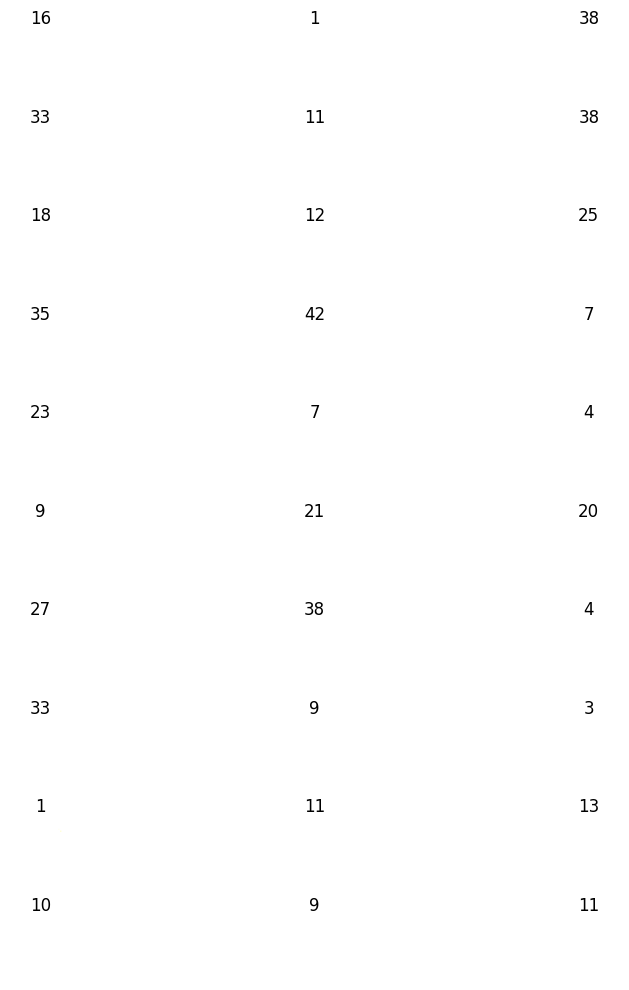

In [ ]:
import matplotlib.pyplot as plt

def show_test_predictions(n=9):
    from math import ceil
    n = min(n, len(test_files))
    plt.figure(figsize=(10, 10))

    # On reprend les n premières images
    sub_files = test_files[:n]
    sub_ds = tf.data.Dataset.from_tensor_slices(sub_files)
    sub_ds = sub_ds.map(load_test_image).batch(n)

    for images in sub_ds.take(1):
        preds = model.predict(images)
        labels_idx = np.argmax(preds, axis=1)

        for i in range(n):
            ax = plt.subplot(ceil(n/3), 3, i + 1)
            plt.imshow(images[i].numpy())
            plt.title(class_names[labels_idx[i]])
            plt.axis("off")

    plt.tight_layout()
    plt.show()

show_test_predictions(30)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


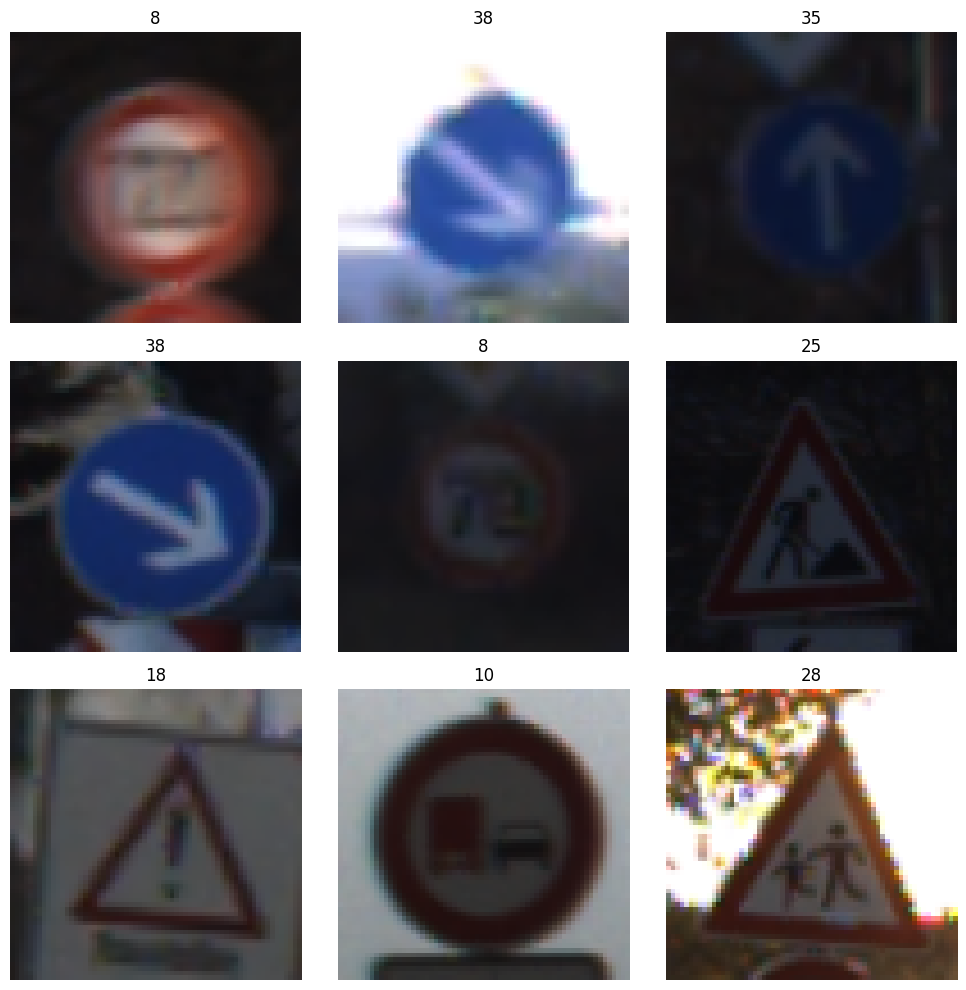

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import ceil
import random

def show_test_predictions_fixed(n=9):
    n = min(n, len(test_files))
    sub_files = random.sample(test_files, n)

    sub_ds = tf.data.Dataset.from_tensor_slices(sub_files)
    sub_ds = sub_ds.map(load_test_image).batch(n)

    for images in sub_ds.take(1):
        preds = model.predict(images)
        labels_idx = np.argmax(preds, axis=1)

        plt.figure(figsize=(10, 10))
        for i in range(n):
            ax = plt.subplot(ceil(n/3), 3, i + 1)

            img = images[i].numpy()

            # Si l'image est en [0,1], on remonte en [0,255]
            if img.max() <= 1.0:
                img = (img * 255.0)

            img = img.astype(np.uint8)

            plt.imshow(img)
            plt.title(str(class_names[labels_idx[i]]))
            plt.axis("off")

        plt.tight_layout()
        plt.show()

show_test_predictions_fixed(9)


In [ ]:
model.save("traffic_sign_model.keras")
